# 走势分析

对日内走势进行总结，以对次日的高低开进行预测

目前最关注的走势
1. 单边
2. 冲高回落/砸低反抽

## 单边趋势
### 构成条件：
1. 收盘价在当日的最高价或最低价的15%
2. 日内所有位置的最大回撤比例不超过当前点位涨幅或跌幅的20%
3. Slope斜率要大于一定值？

In [1]:
import sys
sys.path.append("..")
from BacktestApp import BacktestApp
from PositionManagerPlus import PositionManager
from PlotPlus import PlotPlus
from Chan import Chan

import pandas as pd
import numpy as np

class Trend:
    def __init__(self, contract, pm:PositionManager):
        self.contract = contract
        self.pm = pm
        
    def update(self, bars):
        pass
                    
class TrendBacktestApp(BacktestApp):
    def __init__(self, config_file="config.yml", **kwargs):
        super().__init__(config_file, **kwargs)
        self.trend = { contract.symbol: Trend(contract, self.pm) for contract in self.contracts }
        
    def on_bar_update(self, contract, bars, has_new_bar):
        bars = bars.copy()
        self.trend[contract.symbol].update(bars)

try:
    ba = TrendBacktestApp(config_file="../config_backtest.yml", clientId=20, debug=True, autoConnect=False)
    end_date = "2025-03-31"
    duration_str = "200 D"
    # ba.minutes_backtest(end_date, duration_str)
finally:
    if ba.ib: pass
        # ba.ib.disconnect()

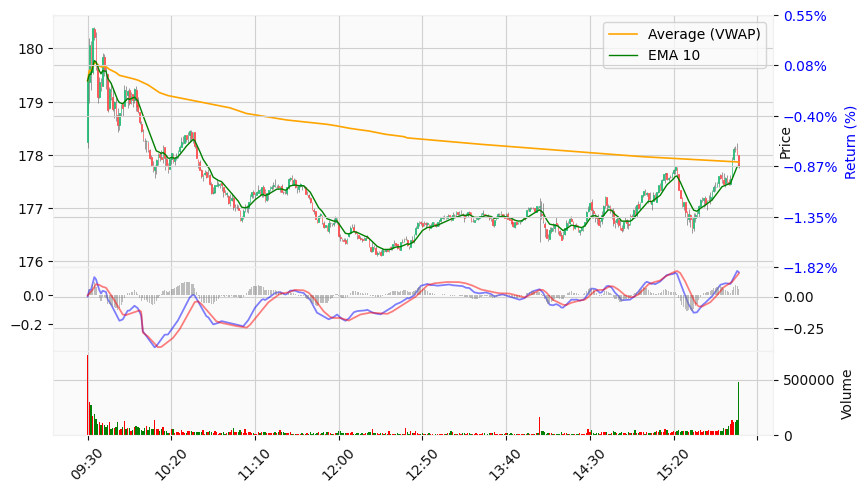

In [2]:
idx = 0
daily = ba.get_historical_data(ba.contracts[0], end_date, duration_str, '1 day')
chan = Chan()
while True:
    date = daily.iloc[idx]['date']
    df = ba.get_historical_data(ba.contracts[0], date)
    df, df_merged = chan.process(df, log=False)

    pp = PlotPlus(df.iloc[:])
    pp.plot_basic(style_type="candle")
    pp.show()
    break